# Neurospheres

## Background

Neural stem and progenitor cells isolated from the central nervous system form, under specific culture conditions, clonal cell clusters known as neurospheres. In this project you will develop a simulation which models the growth of neurospheres based on a cellular automaton model.

Neurospheres develop from a single founder cell which proliferates by cell division into cells of various types including stem cells, progenitor cells and differentiated cells, and under certain conditions cells may die. In each time step, the cells are updated according to the rules governing the probability that a given cell will undergo mitosis (cell division) and what daughter cells are produced as a result.

```{figure} neurosphere_figure.png
---
height: 300px
name: fig_project_neurosphere
---
 The results of a simulation of neurosphere growth. The stem cells
(red) are encapsulated by progenitor cells (orange), differentiated cells (blue), and/or dead cells
(black). Reprinted from {cite}`sipahi2018stochastic`.
```

## Simplified Model

{numref}`neurosphere_fig` shows the results of a simple symmetric model of neurosphere growth. Each array cell is either empty or contains a progenitor cell or a dead cell. Initially all cells are empty except for one progenitor cell. At each timestep, the following rules are applied:
- Each progenitor cell, if at least one of its neighbouring cells is empty, undergoes mitosis (cell division). One daughter cell remains in place and the other moves to one of the empty neighbouring cells (at random). The new daughter cell dies with probability $0.25$.
- If a progenitor cell does not have any empty neighbours then it remains in place.
- Each dead cell remains in place.

In this simulation, we use the definition of a [Von Neumann neighbourhood](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood) consisting of a cell and each of its four adjacent neighbours.

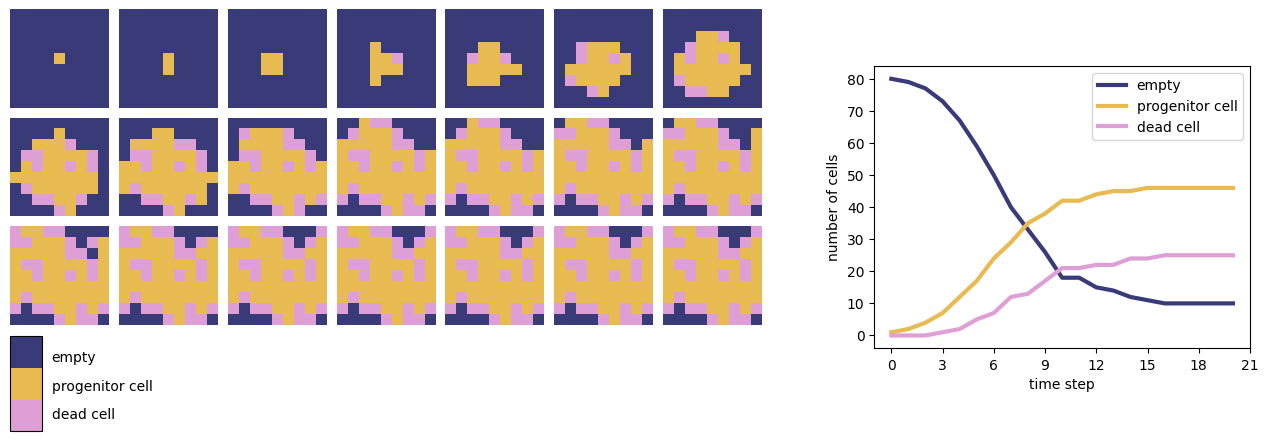

In [1]:
import neurosphere as ns
import numpy as np
from myst_nb import glue

np.random.seed(0)

N = 11
num = 21
grid = np.zeros((N,N))
grid[5,5] = 1

grid_all = np.zeros((num, N, N))
grid_all[0,:,:] = grid

p = np.array([0.05, 0.2, 0.35, 0.5])
for i in range(1, num):
    grid = ns.advance(grid, N, p)
    grid_all[i,:,:] = grid
    
fig = ns.plot_figures(grid_all[:,1:-1,1:-1], 7, ["empty", "progenitor cell", "dead cell"])
glue("neurosphere_fig", fig, display=False)


```{glue:figure} neurosphere_fig
:figwidth: 800px
:name: neurosphere_fig

The results of a symmetric neurosphere model on a 9 by 9 grid (left) and total numbers of empty, progenitor and dead cells over the time course of the simulation (right).
```


## Full Model

In {cite}`sipahi2018stochastic` the authors examine the effect of proliferative potential, contact inhibition, cell death, and
clearance of dead cells on growth rate, final size, and composition of neurospheres. A flowchart describing their model is shown in {numref}`neurosphere_flowchart_fig`.

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S0022519318300857-gr1.jpg
:figwidth: 800px
:name: neurosphere_flowchart_fig

A neurosphere model including proliferative potential, contact inhibition, cell death, and
clearance of dead cells. Reprinted from {cite}`sipahi2018stochastic`.
```

## Starter Code

The following code performs a simulation of progenitor cells only (i.e. excluding cell death).

In [1]:
import numpy as np

# This function takes an n x n array and returns
# a new array after applying the state transition rules
def advance(grid, N):
    result = grid.copy()
    # loop over all cells in grid (except border cells)
    for i in range(1, N-1):
        for j in range(1, N-1):
            # get the coordinates of the 4 cells neighbouring cell i, j
            neighbours = np.array([[i+1,j], [i-1,j], [i,j+1], [i,j-1]])
            # if cell i,j is a progenitor cell and at least one neighbouring cell is empty
            if grid[i, j] == 1:
                if result[i+1,j] == 0 or result[i-1,j] == 0 or result[i,j+1] == 0 or result[i,j-1] == 0:
                    # randomly select an empty neighbouring cell and set it 1 (i.e. progenitor)
                    # NB there may be more efficient ways to do this
                    hit = False
                    while hit == False:
                        r = np.random.choice(4)
                        x,y = neighbours[r,:]
                        if result[x,y] == 0:
                            result[x,y] = 1
                            hit = True
    return result
    
# run simulation

grid = np.zeros((5,5))
grid[2,2] = 1
print("Initial state\n", grid)
for i in range(4):
    grid = advance(grid, 5)
    print("Iteration", i + 1, "\n", grid)



Initial state
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 1 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 2 
 [[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 3 
 [[0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
Iteration 4 
 [[0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


## References

```{bibliography}
:filter: docname in docnames
```